## Accessing image data in a ZIP file

At this stage, we should have some resized data in a zip file somewhere on the computer.

We want to be able to use this data in our workspace in order to train a model.

This notebook will cover the following steps:
1. Where we want to store our data
1. Uploading the ZIP file to the workspace
1. Unzipping that ZIP file
1. Verifying the data exists

## Where should we store our data?

The Docker container will create a nice `workspace` for us that we can recreate if we ever need to start over from scratch. This can allow us to try many different things from the same starting point if we want.

The folder structure for this workspace is
 - data (our collected data will be placed here)
 - images (other images we may need that is not the data)
 - models (models we choose to save will be stored here)
 - notebooks (the notebooks we run can be found in this directory)

**We want to store all of our data in the `/workspace/data` folder**

Keeping all of the data in one place helps us to stay organized, we will always know where to look for the data. 

This repository is also setup so that the data folder is never included in the repository files. So if you are working with a large amount of data, or even sensitive data, that data will not be uploaded to GitHub.

## How do we access the `/workspace/data` folder using code?

Within our code, we can use both **absolute** and **relative** paths. 

For example, this notebook is located in the `3 - Day Three` folder inside `notebooks` and has an absolute path of  
`workspace/notebooks/3 - Day Three - Fine Tuning A Pre-Trained Model`  

To reference a file in the data folder from this notebook we can use the following options below:
 - absolute path: `/workspace/data/FILENAME.zip`
 - relative path: `../../data/filename.zip` (the `..` in this case means from where this file is, go up one folder)

## How do we upload our data into the workspace?

The jupyter notebook environment we are working in has a quick way for us to upload files into the data folder for us to work with. The zip file we will be working with for this lesson is already included as part of the repository, so you don't need to upload any files at this time, but make a note that these instructions will help you pull in your own data in the future.

1. Go to the `Home` tab in the browser that should still be open, this is the page where you opened this notebook from.  
    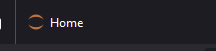

   
1. Click on the root folder icon (if you hover over it, it might say "Jupyter Server Root").  
    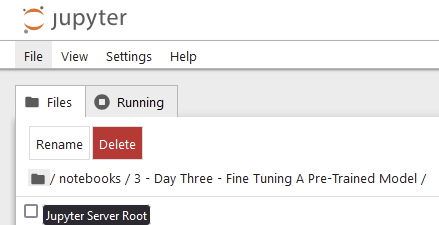


1. Now that you are in the root folder, or `/workspace/`, double click on the `data` folder to open it. You may see some files in there from earlier lessons.  
    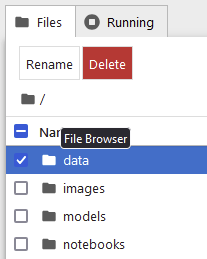



1. In the `/workspace/data` folder, click on the `Upload` button in the top right, find the zip file you want to use on your computer, and click the `Open` button.  
    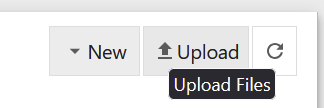


1. You should now see the zip file in that folder within the jupyter notebook environment. In the example below, I imported a zip file called `pets.zip`.  
    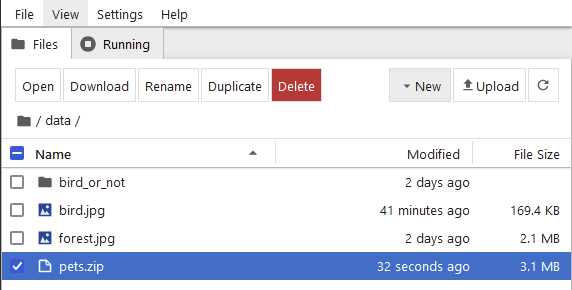

## How do we unzip the file with the data so that it can be used for training?

The code below imports `zipfile` and `os` so that we can work with the filesystem. Take a close look at the comments for each line as explanations for what will happen when we run the code in that cell.

The variable you will need to modify to unzip the `pets.zip` file is `zip_file_name`.

Using our sample zip file named `pets.zip` you will need to modify the assignment of this variable in the code cell below to:  
`zip_file_name = 'pets'`

In [ ]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_name = 'pets' # You will want to change this filename to the filename of your data

zip_file_path = f"/workspace/data/{zip_file_name}.zip" # You should not need to edit anything here because the zip_file_path references the variable containing the filename above, this code assumes it will be a zip file
extract_to_dir = '/workspace/data/' # This is where the extracted zip file will go, turning that one zip file into the directories and images files that we will need to work with for training

# Check if the TRAINING_DATA directory already exists
if not os.path.exists(extract_to_dir+zip_file_name): # If the directory with the real data doesn't exist, run the code inside this if statement. 
    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_to_dir, exist_ok=True) # Since the directory does not exist, it needs to be created

    # Open the zip file and extract its contents
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref: # These two lines extract the data from the zip file, and place them in the defined path for the extract_to_dir variable
        zip_ref.extractall(extract_to_dir)

    print(f"Extracted all files to {extract_to_dir}") # Recall that print statments can be very useful, this print statement let's you know that the extraction process has completed
else: # This else block will only run if the directory with the real data already exists. If you need to unzip the data again, you will have to remove this directory inside the /workspace/data/ directory
    print(f"Directory {extract_to_dir}{zip_file_name} already exists. Skipping extraction.") # Since this block only runs if the directory already exists, it's helpful to get a message that it's already there


Depending on the size of your zip file, and the amount of data you are importing, this may take a while. But once you have extracted the data, the Docker container is setup so that it will persist (stay around) when you come back to this notebook again.

*NOTE: You do not want to run this cell until the zip file has been fully uploaded to the `/workspace/data/` directory. If you see an error that the zip file is not a zip file, but you know that it is, it has not finished uploading yet.*

## How can we verify the data has been correctly unzipped?

If the code cell that unzipped the file was successful, you should have seen the text `Extracted all files to /workspace/data/` as output of that cell. If the folder already existed and this zip file had already been unzipped, you may have seen output stating `Directory /workspace/data/pets already exists. Skipping extraction.`.

Now that we think that our data is there, we have a couple options.
1. We can go look at that data by navigation to the `/workspace/data/pets` folder and look inside.  
    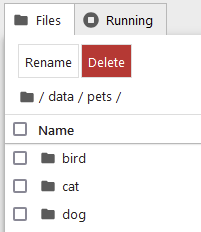


1. Alternatively, we can use the following code to provide a count of the files in the `/workspace/data/pets/` folder:  
    `file_count = sum(len(files) for _, _, files in os.walk('/worskapce/data/pets/'))`  
    `print(file_count)`

If we get our expected number of files from this code, then we now know that there is data in those folders.  
**NOTE: The path to our data is now `/workspace/data/pets/`, which is important to note as we move forward.**

In [ ]:
file_count = sum(len(files) for _, _, files in os.walk('/workspace/data/pets/'))
print(file_count)